In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 
uploaded= files.upload () 

Saving VR.csv to VR (1).csv


In [ ]:
data=pd.read_csv("VR.csv",delimiter=";")

In [ ]:
data.head(5)

,Acidez Fija,Acidez Volartil,Acido Nitrico,Azuca Residual,Cloruros,Anhidrido Sulfuroso Libre,Anhidrido Sulfuroso Total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data0=data.copy() #copia de data

In [ ]:
data0=data0.drop(columns=["Calidad"])# eliminamos la variable dependiente

In [ ]:
round(data.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Acidez Fija,1599.0,8.320,1.741,4.600,7.100,7.900,9.200,15.900
Acidez Volartil,1599.0,0.528,0.179,0.120,0.390,0.520,0.640,1.580
Acido Nitrico,1599.0,0.271,0.195,0.000,0.090,0.260,0.420,1.000
Azuca Residual,1599.0,2.539,1.410,0.900,1.900,2.200,2.600,15.500
Cloruros,1599.0,0.087,0.047,0.012,0.070,0.079,0.090,0.611
Anhidrido Sulfuroso Libre,1599.0,15.872,10.447,1.000,7.000,14.000,21.000,68.000
Anhidrido Sulfuroso Total,1599.0,46.320,32.083,6.000,22.000,38.000,62.000,165.000
Densidad,1599.0,0.999,0.022,0.990,0.996,0.997,0.998,1.369
pH,1599.0,3.311,0.154,2.740,3.210,3.310,3.400,4.010
Sulfatos,1599.0,0.658,0.170,0.330,0.550,0.620,0.730,2.000


In [ ]:
Resumen=data["Calidad"].value_counts().reset_index().rename(columns={"index":"Nivel de Calidad", "Calidad":"Total"})
Resumen["Porcentaje"]=round(Resumen["Total"]/Resumen["Total"].sum(),2)
Resumen

,Nivel de Calidad,Total,Porcentaje
0,5,681,0.43
1,6,638,0.40
2,7,199,0.12
3,4,53,0.03
4,8,18,0.01
5,3,10,0.01


In [ ]:
##CARGAMOS DE LA BIBLIOTECA sklearn de la biblioteca de machine learning
from sklearn.decomposition import PCA # cargamos PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  #Libreria para partir los datos en dos grupos
import pandas as pd
from sklearn.linear_model import LogisticRegression  # regresiones logisticas
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# this is an optional step  Estandarización de datos con media y desviación estándar
df_st =  StandardScaler().fit_transform(data0)  
pd.DataFrame(df_st, columns=data0.columns).head()

,Acidez Fija,Acidez Volartil,Acido Nitrico,Azuca Residual,Cloruros,Anhidrido Sulfuroso Libre,Anhidrido Sulfuroso Total,Densidad,pH,Sulfatos,Alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466531,-0.384113,-0.034489,1.288643,-0.579207,-0.960895
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.873960,0.644796,-0.079239,-0.719933,0.128950,-0.585298
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083534,0.239468,-0.070289,-0.331177,-0.048089,-0.585298
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107965,0.426543,-0.025539,-0.979104,-0.461180,-0.585298
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466531,-0.384113,-0.034489,1.288643,-0.579207,-0.960895


In [ ]:
pca_out = PCA(n_components=5).fit(df_st) #creo PCA para quedarme con 10 comoonentes apenas se  coloca un numero donde las componentes sumadas se acerquen 1 pero hasta donde se estanquen

# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([0.25490357, 0.17533008, 0.12531737, 0.11628468, 0.09936226])

In [ ]:
# Cumulative proportion of variance (from PC1 to PC6)   
np.cumsum(pca_out.explained_variance_ratio_) #cumsum fecuencia acumulada hasta la decima se tiene 77% explica lo de arriba

array([0.25490357, 0.43023364, 0.55555102, 0.67183569, 0.77119796])

In [ ]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data0.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
Acidez Fija,0.489439,-0.086310,-0.132120,0.172148,-0.248303
Acidez Volartil,-0.315902,0.173344,-0.480647,0.096799,0.103068
Acido Nitrico,0.513991,-0.067635,0.186225,-0.020126,-0.106681
Azuca Residual,0.134648,0.328057,0.099708,0.535016,0.255488
Cloruros,0.216867,0.167823,-0.360156,-0.366940,0.489679
Anhidrido Sulfuroso Libre,-0.043747,0.565450,0.345021,-0.133920,-0.124452
Anhidrido Sulfuroso Total,-0.004463,0.594853,0.195380,-0.197321,-0.238141
Densidad,0.174656,0.264932,-0.148929,0.533877,0.291211
pH,-0.467336,-0.035866,0.228335,0.037875,0.281746


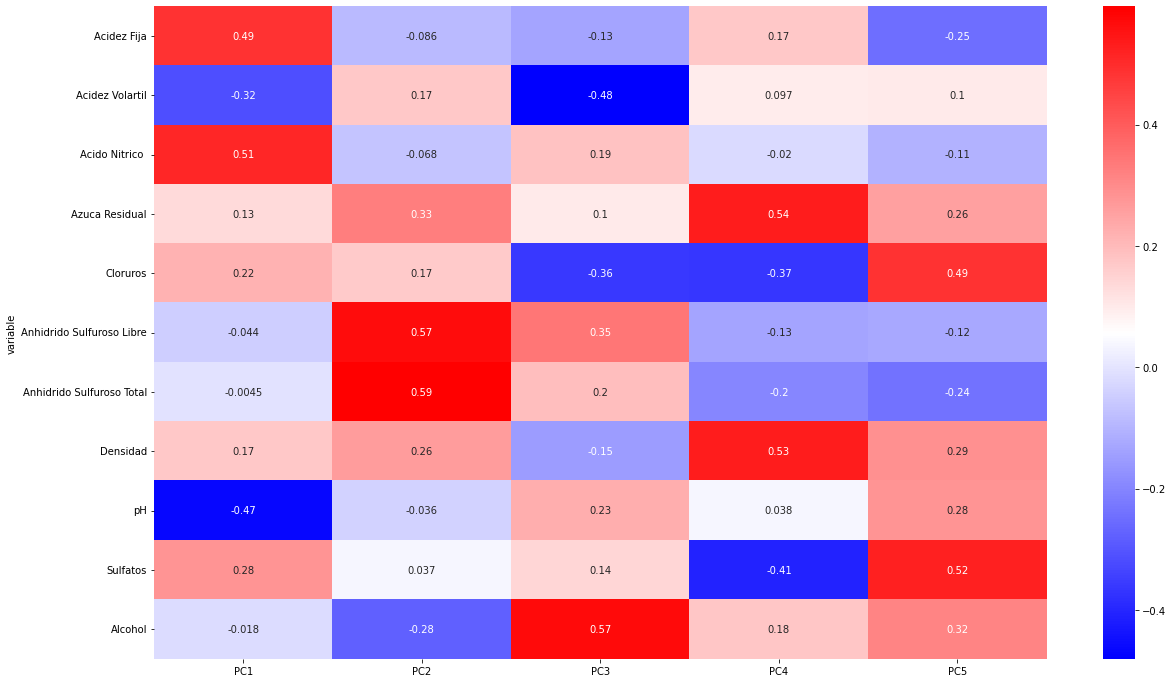

In [ ]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
ax = sns.heatmap(loadings_df, annot=True, cmap='bwr')
plt.show()

In [ ]:
loadings_df[(loadings_df["PC1"]>0.4) | (loadings_df["PC1"]<-0.4)]["PC1"] #filtro para buscar las mas grandes por arriba y las de abajo

variable
Acidez Fija       0.489439
Acido Nitrico     0.513991
pH               -0.467336
Name: PC1, dtype: float64

In [ ]:
loadings_df[(loadings_df["PC2"]>0.4) | (loadings_df["PC2"]<-0.4)]["PC2"] #filtro para buscar las mas grandes por arriba y las de abajo

variable
Anhidrido Sulfuroso Libre    0.565450
Anhidrido Sulfuroso Total    0.594853
Name: PC2, dtype: float64

In [ ]:
loadings_df[(loadings_df["PC3"]>0.4) | (loadings_df["PC3"]<-0.4)]["PC3"] #filtro para buscar las mas grandes por arriba y las de abajo

variable
Acidez Volartil   -0.480647
Alcohol            0.569964
Name: PC3, dtype: float64

In [ ]:
loadings_df[(loadings_df["PC4"]>0.4) | (loadings_df["PC4"]<-0.4)]["PC4"] 

variable
Azuca Residual    0.535016
Densidad          0.533877
Sulfatos         -0.405673
Name: PC4, dtype: float64

In [ ]:
loadings_df[(loadings_df["PC5"]>0.4) | (loadings_df["PC5"]<-0.4)]["PC5"] 

variable
Cloruros    0.489679
Sulfatos    0.524139
Name: PC5, dtype: float64

In [ ]:
abs(loadings_df["PC1"]).mean()

0.24072922741413974

In [ ]:
pca_out.explained_variance_ratio_, pca_out.explained_variance_ratio_[:4].sum()

(array([0.25490357, 0.17533008, 0.12531737, 0.11628468, 0.09936226]),
 0.67183569282438)

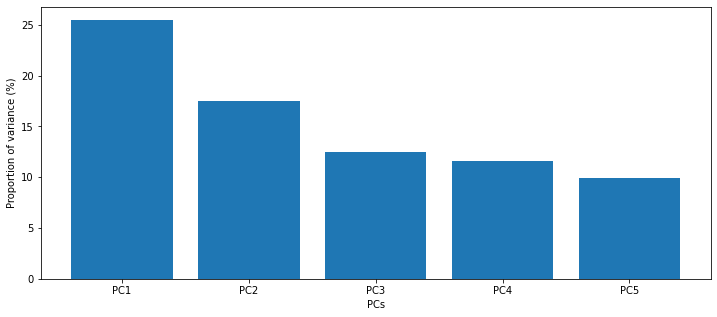

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,pca_out.explained_variance_ratio_*100)
plt.ylabel("Proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

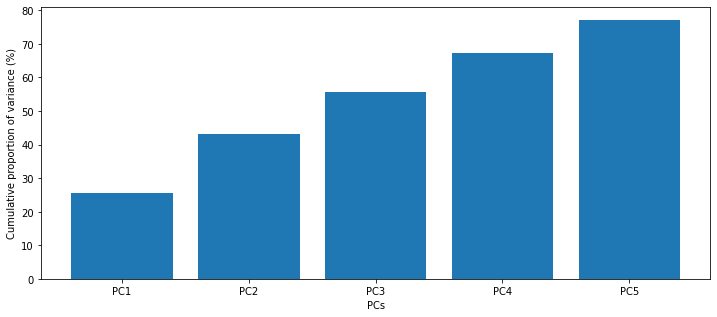

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,np.cumsum(pca_out.explained_variance_ratio_*100))
plt.ylabel("Cumulative proportion of variance (%)")
plt.xlabel("PCs")
plt.show()

In [ ]:
!pip install bioinfokit ###para los cluster instalamos bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


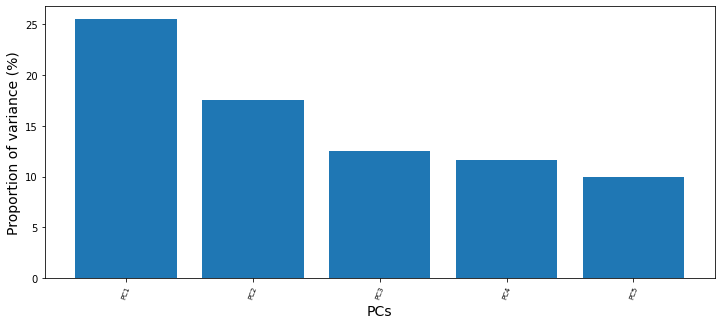

In [ ]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

# get scree plot (for scree or elbow test)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[loadings_df.columns,pca_out.explained_variance_ratio_],show=True,dim=(12,5),axlabelfontsize=14,)
plt.show()
# Scree plot will be saved in the same directory with name screeplot.png

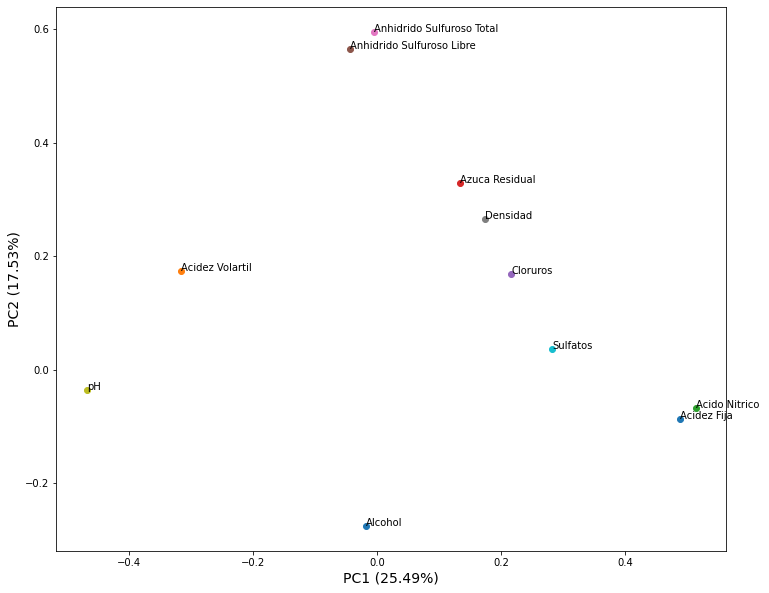

In [ ]:
# get PCA loadings plots (2D and 3D)
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data0.columns.values,
                show=True,dim=(12,10),axlabelfontsize=14,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [ ]:
cmap = plt.cm.Spectral   # Espectral establece los niveles de las variable calidad en colores por tonalidad siendo la máxima la más grande
norm = plt.Normalize(vmin=1, vmax=10)

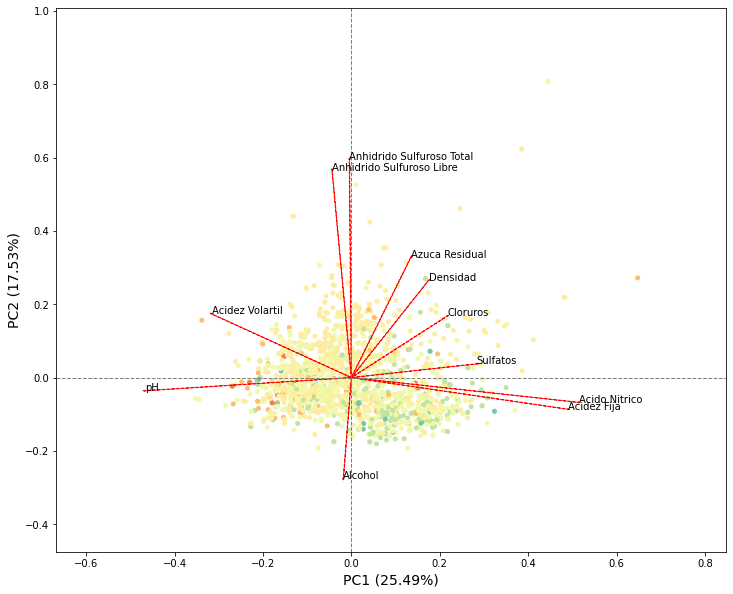

In [ ]:
# 2D
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data0.columns.values,dotsize=16,
               colordot=cmap(norm(data["Calidad"])),arrowcolor='r',arrowlinewidth=0.9,arrowlinestyle='--',show=True,dim=(12,10),axlabelfontsize=14,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [43]:
# MODELO 
import statsmodels.api as sm

In [ ]:
data0

,Acidez Fija,Acidez Volartil,Acido Nitrico,Azuca Residual,Cloruros,Anhidrido Sulfuroso Libre,Anhidrido Sulfuroso Total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [71]:
X=data[["Acido Nitrico ", "Acidez Fija", "Anhidrido Sulfuroso Libre", "Anhidrido Sulfuroso Total", "Alcohol","Acidez Volartil"]]
Y=data["Calidad"]

#X=sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                Calidad   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          1.778e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        20:36:15   Log-Likelihood:                         -1676.9
No. Observations:                1599   AIC:                                      3366.
Df Residuals:                    1593   BIC:                                      3398.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# **ANÁLISIS DE INFORMACIÓN DE CALIDAD DE VINO ROJO PORTUGUÉS MEDIANTE PCA (ANÁLISIS DE COMPONENTE PRINCIPAL)**

# CONJUNTO DE DATOS
La información a análizar corresponde a un conjunto de datos de vino rojo portugués en donde se pretende buscar una relación entre la calidad del vino y las siguientes variables fisíco - Química: 

1.   Acidez fija
2.   Acidez volátil
3.   Ácido cítrico
4.   Azúcar residual
5.   Cloruros
6.   Anhídrido sulfuroso libre
7.   Anhídrido sulfuroso total
8.   Densidad
9.   pH
10.  Sulfatos
11.   Alcohol

La variable de salida corresponde al nivel de calidad  expresado en un intervalo de 1 a 10 Variable

# ESTÁDISTICAS BÁSICAS
El siguiente cuadro realaciones algunas estádisticas básicas asociadas a las 11 variables independientes que representan las caracterisitcas físico-químicas.

|index|count|mean|std|min|25%|50%|75%|max|
|---|---|---|---|---|---|---|---|---|
|Acidez Fija|1599\.0|8\.32|1\.741|4\.6|7\.1|7\.9|9\.2|15\.9|
|Acidez Volartil|1599\.0|0\.528|0\.179|0\.12|0\.39|0\.52|0\.64|1\.58|
|Acido Nitrico |1599\.0|0\.271|0\.195|0\.0|0\.09|0\.26|0\.42|1\.0|
|Azuca Residual|1599\.0|2\.539|1\.41|0\.9|1\.9|2\.2|2\.6|15\.5|
|Cloruros|1599\.0|0\.087|0\.047|0\.012|0\.07|0\.079|0\.09|0\.611|
|Anhidrido Sulfuroso Libre|1599\.0|15\.872|10\.447|1\.0|7\.0|14\.0|21\.0|68\.0|
|Anhidrido Sulfuroso Total|1599\.0|46\.32|32\.083|6\.0|22\.0|38\.0|62\.0|165\.0|
|Densidad|1599\.0|0\.999|0\.022|0\.99|0\.996|0\.997|0\.998|1\.369|
|pH|1599\.0|3\.311|0\.154|2\.74|3\.21|3\.31|3\.4|4\.01|
|Sulfatos|1599\.0|0\.658|0\.17|0\.33|0\.55|0\.62|0\.73|2\.0|
|Alcohol|1599\.0|10\.423|1\.065|8\.4|9\.5|10\.2|11\.1|14\.9|
|Calidad|1599\.0|5\.636|0\.808|3\.0|5\.0|6\.0|6\.0|8\.0|

De esta información podemos establecer que para cada variable se tomaron 1599 mediciones. Las variables que presentan más dispersión en cuando a sus datos son el Anhídrido sulfuroso Total y la Densidad  con una desviación estándar de 32,083 y 10,447 respectivamente 


El la siguiente tabla podemos ver que que de los 11 niveles de calidad solo fueron evaluados los niveles 3, 4, 5, 6, 7 , 8, es decir la calidad del vino no está por debajo de 4 pero tampoco hay evaluación de un nivel de excelencia de calidad que sería una evaluación de 9 y 10. También se puede decir que estos vinos presenta para los evaluadores una calidad media en donde en el nivel 5 y 6 se concentran el 83% de las mediciones

|Nivel de Calidad|Total|Porcentaje|
|---|---|---|
|5|681|0\.43|
|6|638|0\.4|
|7|199|0\.12|
|4|53|0\.03|
|8|18|0\.01|
|3|10|0\.01|

# ANÁLISIS DE COMPONENTES PRINCIPALES

Una vez normalizados los datos se decubre que al trabajar con 5 componentes obtenemos si lo podemos decir de esta forma como que estos componentes representan en un 77,11 % el total de los datos.

Al utilizar 5 componentes podemos inferir lo siguiente:

*   **COMPONENTE PRINCIPAL 1 (PC1):** Contiene en mayor medida las variables Acidéz Fija (0,48), Acido cítrico (0,51) y pH (-0,46)
*   **COMPONENTE PRINCIPAL 2 (PC2):** Contiene en mayor medida las variables Anhidrido Sulfuroso Libre (0.57) y Anhidrido Sulfuroso Total (0.59)
*   **COMPONENTE PRINCIPAL 3 (PC3):** Contiene en mayor medida las variables Acidéz Volatil (-0.480647) y Alcohol (0.57)
*   **COMPONENTE PRINCIPAL 4 (PC4):**Contiene en mayor medida las variables Azucar Residual (0,54) y Densida (0,53)
*   **COMPONENTE PRINCIPAL 5 (PC5):** Contiene en mayor medida las variables Cloruros (0,49) y sulfatos (-0,52)

Se utiliza gráficamente una heramienta de clusters que nos permite generar la siguiente imagen: 
![Imagen 1. Compras por Genero](https://github.com/Neverurueta/MACHIN-LEARNING.-TAREA-2/blob/main/Imagen%201.png?raw=true)

De la imagen podemos influir que a partir de la componente 1 las variables que más influencias tiene en dicha componente presentan son el acido cítrico, la ácidez fija y le pH, mientras que para la componente principal 2 los anhidridos libres y totales y el Alcohol son las varaibles que mayor peso tienen en dicha componente. 

# ANÁLISIS DE REGRESIÓN LINEAL

Verificando un modelo de regresión lineal al ingresar las variable mencionadas que afectan los componentes principales inicialmente el modelo de regresión no representa una relación entre las variables independientes y la dependiente genreando un coeficiente de correlación de 32,5% posteriormente se elimina el termino independiente en la ecuación y el modelose reajusta hasta el punto de describir una relación del 98,6% entre las variables independientes y la variable dependiente.